# Análisis individual de distribuciones Hale y Anti-Hale

Las Regiones Activas solares (RA) son extensas concentraciones de campo magnético de varios miles de Gauss (*G*) y flujo magnético típico de hasta $10^{24}Mx$  en donde, en general, se generan manchas solares. Desde que se generan hasta que desaparecen, pueden transcurrir desde semanas hasta meses. Generalmente son configuraciones bipolares de decenas de Megametros ($10^{6}m$)

Una RA está formada por BMR (Bipolar Magnetic Region) con una orientación predominante ($\approx 95 \% $), cumpliendo la Ley de Hale (Hale & Nicholson 1925), que establece que los BMR presentan una orientación de polaridad magnética este-oeste sistemática para un hemisferio solar determinado, esta orientación es opuesta en ambos hemisferios. La polaridad principal de cada hemisferio se invierte para ciclos pares e impares. El decaimiento de una RA comienza tan pronto como el flujo alcanza su máximo, con una tasa promedio de decaimiento de $10^{20}Mx/ h$ (Harvey 1993). El número de RA varía con un periodo de 8 a 15 años, y que en promedio es de unos 11 años, lo que revela la existencia de un ciclo magnético solar.

Por otro lado, la latitud a la que aparecen las RA disminuye a medida que avanza el ciclo magnético solar (desde las latitudes medias hacia el ecuador), lo que se conoce como Ley de Spôrer. Este comportamiento fue indentificado por Carrington a partir de observaciones de manchas solares y se representa mediante la gráfica de tiempo vs latitud  en lo que se conoce como diagrama de Mariposa de Maunder. 

Estadísticamente se observa que la dirección de los ejes de los bipolos forma un ángulo con la dirección este-oeste, lo que se conoce como angulo de $tilt$, y es tal que, en ambos hemisferios, la polaridad precedente (polaridad que se haya hacia el oeste, en sentido de la rotación solar) está más próxima al ecuador que la siguiente (polaridad que se haya hacia el este). A este comportamiento se lo conoce como ley de Joy (Joy 1919).



# Primeras configuraciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
KPVT = pd.read_csv("BARD_1976-1993_KPVT_tilts.csv") 
SPMG = pd.read_csv('BARD_1992-1999_SPMG_tilts.csv') 
MDI = pd.read_csv('BARD_1996-2010_MDI_tilts.csv') 
HMI = pd.read_csv('BARD_2010-2016_HMI_tilts.csv')

In [3]:
# flux mdi calibration (paper pag 4)

factor_calibration_mdi = 0.8

MDI['BMRFlux'] = MDI['BMRFlux'] * factor_calibration_mdi

In [5]:
# flux cutoff

flux_cutoff = 3e21

# KPVT
flux_mask_kpvt = KPVT['BMRFlux'] > flux_cutoff
KPVT = KPVT[flux_mask_kpvt]
# SPMG
flux_mask_spmg = SPMG['BMRFlux'] > flux_cutoff
SPMG = SPMG[flux_mask_spmg]
# MDI
flux_mask_mdi = MDI['BMRFlux'] > flux_cutoff
MDI = MDI[flux_mask_mdi]
# HMI
flux_mask_hmi = HMI['BMRFlux'] > flux_cutoff
HMI = HMI[flux_mask_hmi]

In [41]:
# Añadir AH_status

# tabla 1
mascara_ah21 = np.logical_or(KPVT['AH_21n'], KPVT['AH_21s'])
mascara_ah22 = np.logical_or(KPVT['AH_22n'], KPVT['AH_22s'])
mascara_ah = np.logical_or(mascara_ah21, mascara_ah22)

ah_status = np.multiply(mascara_ah, 1)
KPVT['AH_Status'] = ah_status

# tabla 2
mascara_ah22 = np.logical_or(SPMG['AH_22n'], SPMG['AH_22s'])
mascara_ah23 = np.logical_or(SPMG['AH_23n'], SPMG['AH_23s'])
mascara_ah = np.logical_or(mascara_ah22, mascara_ah23)

ah_status = np.multiply(mascara_ah, 1)
SPMG['AH_Status'] = ah_status

# tabla 3
mascara_ah23 = np.logical_or(MDI['AH_23n'], MDI['AH_23s'])
mascara_ah24 = np.logical_or(MDI['AH_24n'], MDI['AH_24s'])
mascara_ah = np.logical_or(mascara_ah23, mascara_ah24)

ah_status = np.multiply(mascara_ah, 1)
MDI['AH_Status'] = ah_status

# tabla 4
mascara_ah24 = np.logical_or(HMI['AH_24n'], HMI['AH_24s'])

ah_status = np.multiply(mascara_ah24, 1)
HMI['AH_Status'] = ah_status


In [42]:
if os.path.exists('Tiempo_vs_BMRLatitude') and os.path.exists('Tiempo_vs_BMRLatitude'):
    None
else:
    os.mkdir('Tiempo_vs_BMRLatitude')
    os.mkdir('BMRLongitude_vs_BMRLatitude')

In [43]:
# date

# KPVT
tiempo_1 = pd.to_datetime(KPVT.loc[:,['Year','Month','Day','Hour','Minute','Second']])
KPVT['Date'] = tiempo_1
# SPMG
tiempo_2 = pd.to_datetime(SPMG.loc[:,['Year','Month','Day','Hour','Minute','Second']])
SPMG['Date'] = tiempo_2
# MDI
tiempo_3 = pd.to_datetime(MDI.loc[:,['Year','Month','Day','Hour','Minute','Second']])
MDI['Date'] = tiempo_3
# HMI
tiempo_4 = pd.to_datetime(HMI.loc[:,['Year','Month','Day','Hour','Minute','Second']])
HMI['Date'] = tiempo_4

In [44]:
# translapos

# KPVT > SPMG
# MDI > SPMG
# HMI > MDI

# SPMG

d_min = KPVT['Date'].max()
d_max = MDI['Date'].min()
date_mask_spmg_min = SPMG['Date'] > d_min
SPMG = SPMG[date_mask_spmg_min]
date_mask_spmg_max = SPMG['Date'] < d_max
SPMG = SPMG[date_mask_spmg_max].reset_index(drop=True)

# MDI

d_max = HMI['Date'].min()
date_mask_mdi_max = MDI['Date'] < d_max
MDI = MDI[date_mask_mdi_max].reset_index(drop=True)


In [45]:
# report the telescope that provides the data 

KPVT['Telescope'] = 'KPVT'
SPMG['Telescope'] = 'SPMG'
MDI['Telescope'] = 'MDI'
HMI['Telescope'] = 'HMI'

In [46]:
KPVT['Telescope_BMRLabel'] = KPVT['Telescope'] +'_' + KPVT['BMRLabel'].astype(str) 
SPMG['Telescope_BMRLabel'] = SPMG['Telescope'] +'_' + SPMG['BMRLabel'].astype(str) 
MDI['Telescope_BMRLabel'] = MDI['Telescope'] +'_' + MDI['BMRLabel'].astype(str) 
HMI['Telescope_BMRLabel'] = HMI['Telescope'] +'_' + HMI['BMRLabel'].astype(str) 

In [47]:
mega_tabla = pd.concat([KPVT, SPMG, MDI, HMI]).reset_index(drop=True)

In [48]:
len(mega_tabla)

7405

In [49]:
# reference day
# time_0 = '1970-01-01 00:00:00'

time_0 = pd.to_datetime(0)
rd = (mega_tabla['Date'] - time_0)

for i in range(len(rd)):
    rd[i] = rd[i].days

mega_tabla['ReferenceDay'] = rd

In [50]:
mega_tabla.to_csv('BMR_AH_HH_KPVT_SPMG_MDI_HMI_combined.csv')

# KPVT (1976 - 1993)

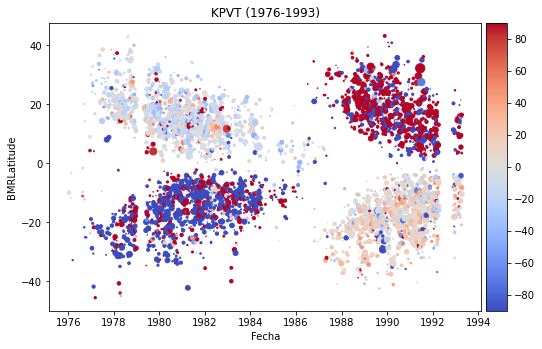

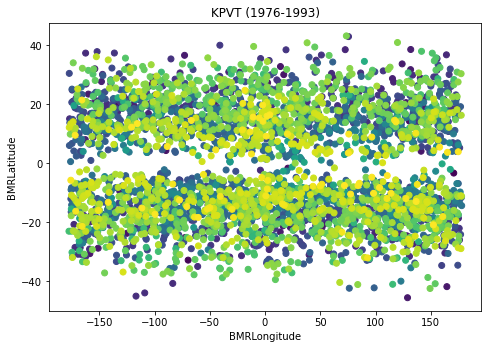

In [83]:
flux = KPVT['BMRFlux']

# Normalizar flujo

def minmax_norm(f):
    return (f - f.min()) / (f.max() - f.min())

flux_norm = 100 * minmax_norm(flux)

# plot

# spoer
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
c = ax.scatter(KPVT['Date'], KPVT['BMRLatitude'], s=flux_norm, c=KPVT['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
ax.set_title('KPVT (1976-1993)')
ax.set_xlabel('Fecha')
ax.set_ylabel('BMRLatitude')
colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
fig.colorbar(c, cax=colorbar_ax)
fig.savefig('Tiempo_vs_BMRLatitude/KPVT.png', bbox_inches='tight')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
ax.scatter(KPVT['BMRLongitude'], KPVT['BMRLatitude'], c=tiempo_1, cmap='viridis')
ax.set_title('KPVT (1976-1993)')
ax.set_xlabel('BMRLongitude')
ax.set_ylabel('BMRLatitude')
fig.savefig('BMRLongitude_vs_BMRLatitude/KPVT.png', bbox_inches='tight')
plt.show()

In [84]:
# revisar si las carpetas fueron creadas

if os.path.exists('KPVT_(1976-1993)') and os.path.exists('KPVT_(1976-1993)/lat-t') and os.path.exists('KPVT_(1976-1993)/lat-long'):
    None
else:
    os.mkdir('KPVT_(1976-1993)')
    os.mkdir('KPVT_(1976-1993)/lat-t')
    os.mkdir('KPVT_(1976-1993)/lat-long')

# plot

for i in range(1976,1994):
    mascara_y = KPVT['Year'] == i
    for j in range(6):
        mascara_m = np.logical_and(KPVT['Month'] > 2*j, KPVT['Month'] < 2*j+3)
        data_d = np.logical_and(mascara_y, mascara_m)               

        mascara_hh21 = np.logical_or(KPVT['HH_21n'], KPVT['HH_21s'])
        mascara_hh22 = np.logical_or(KPVT['HH_22n'], KPVT['HH_22s'])
        mascara_hh = np.logical_or(mascara_hh21, mascara_hh22)

        mascara_ah21 = np.logical_or(KPVT['AH_21n'], KPVT['AH_21s'])
        mascara_ah22 = np.logical_or(KPVT['AH_22n'], KPVT['AH_22s'])
        mascara_ah = np.logical_or(mascara_ah21, mascara_ah22)

        data_hale = np.logical_and(data_d, mascara_hh)                           # usar mascara
        data_ahale = np.logical_and(data_d, mascara_ah)

        hale = KPVT[data_hale]
        ahale = KPVT[data_ahale]

        if hale.shape[0] > 0 and ahale.shape[0] > 0:

            #fig = plt.figure()
            #ax = fig.add_axes([0.1,0.1,1,1])
            #c = ax.scatter(data['Date'], data['BMRLatitude'], c=data['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
            #ax.set_title('KPVT (1976-1993)')
            #ax.set_xlabel('Fecha')
            #ax.set_ylabel('BMRLatitude')
            #colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
            #fig.colorbar(c, cax=colorbar_ax)
            #fig.savefig('KPVT_(1976-1993)/lat-t/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'Tiempo_vs_BMRLatitude.png', bbox_inches='tight')
            #plt.close(fig)

            v_data = pd.concat([hale['ReferenceDay'], ahale['ReferenceDay']])
            v_min = np.min(v_data) ; v_max = np.max(v_data)

            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
            fig.suptitle('KPVT (1976-1993)', fontsize=16)

            hh1 = ax1.scatter(hale['BMRLongitude'], hale['BMRLatitude'], c=hale['ReferenceDay'], cmap='gist_rainbow',vmin=v_min, vmax=v_max, marker='o', label='Hale') # Hale
            ax1.scatter(ahale['BMRLongitude'], ahale['BMRLatitude'], c=ahale['ReferenceDay'], cmap='gist_rainbow',vmin=v_min, vmax=v_max, marker='s', label='AntiHale' ) # Anti Hale
            cb = fig.colorbar(hh1, ax=ax1, label='counts')

            ax1.legend()
            ax1.set_title('gist_rainbow')
            ax1.set_xlabel('BMRLongitude')
            ax1.set_ylabel('BMRLatitude')

            hh2 = ax2.scatter(hale['BMRLongitude'], hale['BMRLatitude'], c=hale['ReferenceDay'], cmap='magma',vmin=v_min, vmax=v_max, marker='o', label='Hale') # Hale
            ax2.scatter(ahale['BMRLongitude'], ahale['BMRLatitude'], c=ahale['ReferenceDay'], cmap='magma',vmin=v_min, vmax=v_max, marker='s', label='AntiHale' ) # Anti Hale
            cb = fig.colorbar(hh2, ax=ax2, label='counts')

            ax2.legend()
            ax2.set_title('magma')
            ax2.set_xlabel('BMRLongitude')
            ax2.set_ylabel('BMRLatitude')

            fig.savefig('KPVT_(1976-1993)/lat-long/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'BMRLongitude_vs_BMRLatitude.png', bbox_inches='tight')
            plt.close(fig)
            
        else: None

# SPMG (1992-1999)

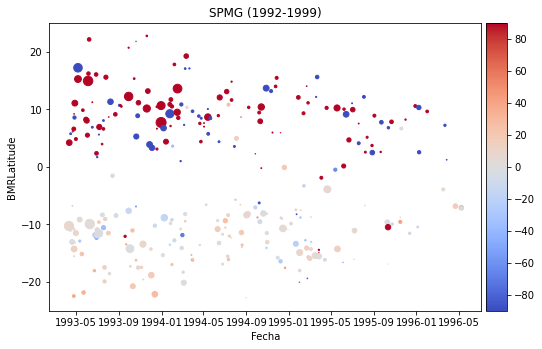

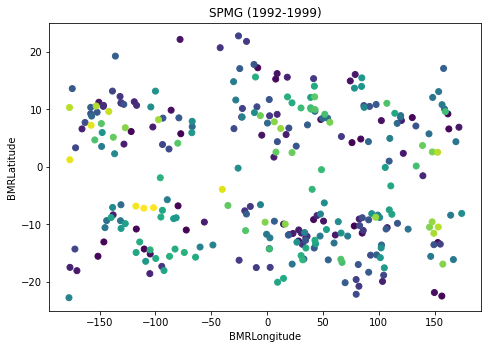

In [85]:
flux = SPMG['BMRFlux']

# Normalizar flujo

def minmax_norm(flux):
    return (flux - flux.min()) / (flux.max() - flux.min())

flux_norm = 100 * minmax_norm(flux)

# plot

# spoer
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
c = ax.scatter(SPMG['Date'], SPMG['BMRLatitude'], s=flux_norm, c=SPMG['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
ax.set_title('SPMG (1992-1999)')
ax.set_xlabel('Fecha')
ax.set_ylabel('BMRLatitude')
colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
fig.colorbar(c, cax=colorbar_ax)
fig.savefig('Tiempo_vs_BMRLatitude/SPMG.png', bbox_inches='tight')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
ax.scatter(SPMG['BMRLongitude'], SPMG['BMRLatitude'], c=SPMG['Date'], cmap='viridis')
ax.set_title('SPMG (1992-1999)')
ax.set_xlabel('BMRLongitude')
ax.set_ylabel('BMRLatitude')
fig.savefig('BMRLongitude_vs_BMRLatitude/SPMG.png', bbox_inches='tight')
plt.show()

In [86]:
# revisar si las carpetas fueron creadas

if os.path.exists('SPMG_(1992-1999)') and os.path.exists('SPMG_(1992-1999)/lat-t') and os.path.exists('SPMG_(1992-1999)/lat-long'):
    None
else:
    os.mkdir('SPMG_(1992-1999)')
    os.mkdir('SPMG_(1992-1999)/lat-t')
    os.mkdir('SPMG_(1992-1999)/lat-long')

# plot

for i in range(1992,2000):
    mascara_y = SPMG['Year'] == i
    for j in range(6):
        mascara_m = np.logical_and(SPMG['Month'] > 2*j, SPMG['Month'] < 2*j+3)
        data_d = np.logical_and(mascara_y, mascara_m)

        mascara_hh22 = np.logical_or(SPMG['HH_22n'], SPMG['HH_22s'])
        mascara_hh23 = np.logical_or(SPMG['HH_23n'], SPMG['HH_23s'])
        mascara_hh = np.logical_or(mascara_hh22, mascara_hh23)

        mascara_ah22 = np.logical_or(SPMG['AH_22n'], SPMG['AH_22s'])
        mascara_ah23 = np.logical_or(SPMG['AH_23n'], SPMG['AH_23s'])
        mascara_ah = np.logical_or(mascara_ah22, mascara_ah23)

        data_hale = np.logical_and(data_d, mascara_hh)                   
        data_ahale = np.logical_and(data_d, mascara_ah)

        hale = SPMG[data_hale]
        ahale = SPMG[data_ahale]


        if hale.shape[0] > 0 and ahale.shape[0] > 0:

            #fig = plt.figure()
            #ax = fig.add_axes([0.1,0.1,1,1])
            #c = ax.scatter(data['Date'], data['BMRLatitude'], c=data['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
            #ax.set_title('SPMG (1992-1999)')
            #ax.set_xlabel('Fecha')
            #ax.set_ylabel('BMRLatitude')
            #colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
            #fig.colorbar(c, cax=colorbar_ax)
            #fig.savefig('SPMG_(1992-1999)/lat-t/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'Tiempo_vs_BMRLatitude.png', bbox_inches='tight')
            #plt.close(fig)

            v_data = pd.concat([hale['ReferenceDay'], ahale['ReferenceDay']])
            v_min = np.min(v_data) ; v_max = np.max(v_data)

            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
            fig.suptitle('SPMG (1992-1999)', fontsize=16)
            
            hh1 = ax1.scatter(hale['BMRLongitude'], hale['BMRLatitude'], c=hale['ReferenceDay'], cmap='gist_rainbow', vmin=v_min, vmax=v_max, marker='o', label='Hale') # Hale
            ax1.scatter(ahale['BMRLongitude'], ahale['BMRLatitude'], c=ahale['ReferenceDay'], cmap='gist_rainbow', vmin=v_min, vmax=v_max, marker='s', label='AntiHale' ) # Anti Hale
            cb = fig.colorbar(hh1, ax=ax1, label='counts')
            
            ax1.legend()
            ax1.set_title('gist_rainbow')
            ax1.set_xlabel('BMRLongitude')
            ax1.set_ylabel('BMRLatitude')

            hh2 = ax2.scatter(hale['BMRLongitude'], hale['BMRLatitude'], c=hale['ReferenceDay'], cmap='magma',vmin=v_min, vmax=v_max, marker='o', label='Hale') # Hale
            ax2.scatter(ahale['BMRLongitude'], ahale['BMRLatitude'], c=ahale['ReferenceDay'], cmap='magma',vmin=v_min, vmax=v_max, marker='s', label='AntiHale' ) # Anti Hale
            cb = fig.colorbar(hh2, ax=ax2, label='counts')

            ax2.legend()
            ax2.set_title('magma')
            ax2.set_xlabel('BMRLongitude')
            ax2.set_ylabel('BMRLatitude')

            fig.savefig('SPMG_(1992-1999)/lat-long/'+'/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'BMRLongitude_vs_BMRLatitude.png', bbox_inches='tight')
            plt.close(fig)
        else: None

# MDI (1996-2010)

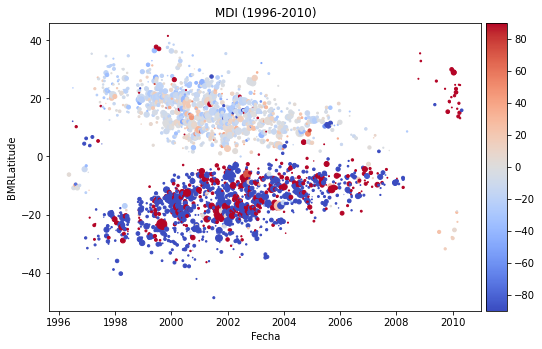

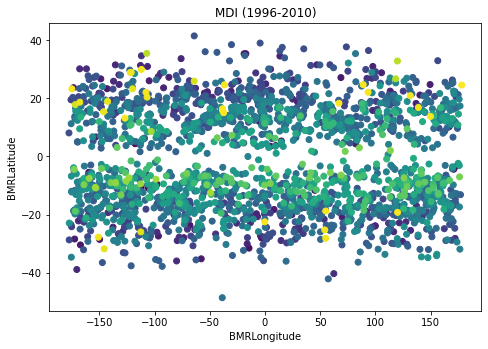

In [87]:
flux = MDI['BMRFlux']

# Normalizar flujo

def minmax_norm(df_input):
    return (flux - flux.min()) / (flux.max() - flux.min())

flux_norm = 100 * minmax_norm(flux)

# plot

# spoer
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
c = ax.scatter(MDI['Date'], MDI['BMRLatitude'], s=flux_norm, c=MDI['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
ax.set_title('MDI (1996-2010)')
ax.set_xlabel('Fecha')
ax.set_ylabel('BMRLatitude')
colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
fig.colorbar(c, cax=colorbar_ax)
fig.savefig('Tiempo_vs_BMRLatitude/MDI.png', bbox_inches='tight')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
ax.scatter(MDI['BMRLongitude'], MDI['BMRLatitude'], c=MDI['Date'], cmap='viridis')
ax.set_title('MDI (1996-2010)')
ax.set_xlabel('BMRLongitude')
ax.set_ylabel('BMRLatitude')
fig.savefig('BMRLongitude_vs_BMRLatitude/MDI.png', bbox_inches='tight')
plt.show()

In [88]:
# revisar si las carpetas fueron creadas

if os.path.exists('MDI_(1996-2010)') and os.path.exists('MDI_(1996-2010)/lat-t') and os.path.exists('MDI_(1996-2010)/lat-long'):
    None
else:
    os.mkdir('MDI_(1996-2010)')
    os.mkdir('MDI_(1996-2010)/lat-t')
    os.mkdir('MDI_(1996-2010)/lat-long')

# plot

for i in range(1996,2011):
    mascara_y = MDI['Year'] == i
    for j in range(6):
        mascara_m = np.logical_and(MDI['Month'] > 2*j, MDI['Month'] < 2*j+3)
        data_d = np.logical_and(mascara_y, mascara_m)

        mascara_hh23 = np.logical_or(MDI['HH_23n'], MDI['HH_23s'])
        mascara_hh24 = np.logical_or(MDI['HH_24n'], MDI['HH_24s'])
        mascara_hh = np.logical_or(mascara_hh23, mascara_hh24)

        mascara_ah23 = np.logical_or(MDI['AH_23n'], MDI['AH_23s'])
        mascara_ah24 = np.logical_or(MDI['AH_24n'], MDI['AH_24s'])
        mascara_ah = np.logical_or(mascara_ah23, mascara_ah24)

        data_hale = np.logical_and(data_d, mascara_hh)                   
        data_ahale = np.logical_and(data_d, mascara_ah)

        hale = MDI[data_hale]
        ahale = MDI[data_ahale]


        if hale.shape[0] > 0 and ahale.shape[0] > 0:

            #fig = plt.figure()
            #ax = fig.add_axes([0.1,0.1,1,1])
            #c = ax.scatter(data['Date'], data['BMRLatitude'], c=data['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
            #ax.set_title('MDI (1996-2010)')
            #ax.set_xlabel('Fecha')
            #ax.set_ylabel('BMRLatitude')
            #colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
            #fig.colorbar(c, cax=colorbar_ax)
            #fig.savefig('MDI_(1996-2010)/lat-t/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'Tiempo_vs_BMRLatitude.png', bbox_inches='tight')
            #plt.close(fig)

            v_data = pd.concat([hale['ReferenceDay'], ahale['ReferenceDay']])
            v_min = np.min(v_data) ; v_max = np.max(v_data)

            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
            fig.suptitle('MDI (1996-2010)', fontsize=16)

            hh1 = ax1.scatter(hale['BMRLongitude'], hale['BMRLatitude'], c=hale['ReferenceDay'], cmap='gist_rainbow', vmin=v_min, vmax=v_max, marker='o', label='Hale') # Hale
            ax1.scatter(ahale['BMRLongitude'], ahale['BMRLatitude'], c=ahale['ReferenceDay'], cmap='gist_rainbow', vmin=v_min, vmax=v_max, marker='s', label='AntiHale' ) # Anti Hale
            cb = fig.colorbar(hh1, ax=ax1, label='counts')
            
            ax1.legend()
            ax1.set_title('gist_rainbow')
            ax1.set_xlabel('BMRLongitude')
            ax1.set_ylabel('BMRLatitude')

            hh2 = ax2.scatter(hale['BMRLongitude'], hale['BMRLatitude'], c=hale['ReferenceDay'], cmap='magma',vmin=v_min, vmax=v_max, marker='o', label='Hale') # Hale
            ax2.scatter(ahale['BMRLongitude'], ahale['BMRLatitude'], c=ahale['ReferenceDay'], cmap='magma',vmin=v_min, vmax=v_max, marker='s', label='AntiHale' ) # Anti Hale
            cb = fig.colorbar(hh2, ax=ax2, label='counts')

            ax2.legend()
            ax2.set_title('magma')
            ax2.set_xlabel('BMRLongitude')
            ax2.set_ylabel('BMRLatitude')
            
            fig.savefig('MDI_(1996-2010)/lat-long/'+'/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'BMRLongitude_vs_BMRLatitude.png', bbox_inches='tight')
            plt.close(fig)
        else: None

# HMI (2010-2016)

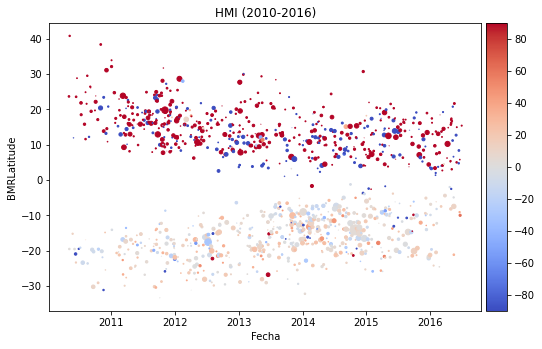

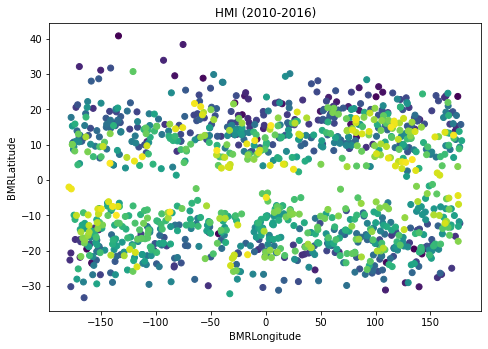

In [89]:
flux = HMI['BMRFlux']

# Normalizar flujo

def minmax_norm(flux):
    return (flux - flux.min()) / (flux.max() - flux.min())

flux_norm = 100 * minmax_norm(flux)

# plot

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
c = ax.scatter(HMI['Date'], HMI['BMRLatitude'], s=flux_norm, c=HMI['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
ax.set_title('HMI (2010-2016)')
ax.set_xlabel('Fecha')
ax.set_ylabel('BMRLatitude')
colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
fig.colorbar(c, cax=colorbar_ax)
fig.savefig('Tiempo_vs_BMRLatitude/HMI.png', bbox_inches='tight')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
ax.scatter(HMI['BMRLongitude'], HMI['BMRLatitude'], c=HMI['Date'], cmap='viridis')
ax.set_title('HMI (2010-2016)')
ax.set_xlabel('BMRLongitude')
ax.set_ylabel('BMRLatitude')
fig.savefig('BMRLongitude_vs_BMRLatitude/HMI.png', bbox_inches='tight')
plt.show()

In [90]:
# revisar si las carpetas fueron creadas

if os.path.exists('HMI_(2010-2016)') and os.path.exists('HMI_(2010-2016)/lat-t') and os.path.exists('HMI_(2010-2016)/lat-long'):
    None
else:
    os.mkdir('HMI_(2010-2016)')
    os.mkdir('HMI_(2010-2016)/lat-t')
    os.mkdir('HMI_(2010-2016)/lat-long')

# plots

for i in range(2010,2017):
    mascara_y = HMI['Year'] == i
    for j in range(6):
        mascara_m = np.logical_and(HMI['Month'] > 2*j, HMI['Month'] < 2*j+3)
        data_d = np.logical_and(mascara_y, mascara_m)

        mascara_hh24 = np.logical_or(HMI['HH_24n'], HMI['HH_24s'])
        mascara_ah24 = np.logical_or(HMI['AH_24n'], HMI['AH_24s'])
        
        data_hale = np.logical_and(data_d, mascara_hh24)                   
        data_ahale = np.logical_and(data_d, mascara_ah24)

        hale = HMI[data_hale]
        ahale = HMI[data_ahale]


        if hale.shape[0] > 0 and ahale.shape[0] > 0:

            #fig = plt.figure()
            #ax = fig.add_axes([0.1,0.1,1,1])
            #c = ax.scatter(data['Date'], data['BMRLatitude'], c=data['Tilt_abs'], cmap='coolwarm', vmin=-90, vmax=90)
            #ax.set_title('HMI (2010-2016)')
            #ax.set_xlabel('Fecha')
            #ax.set_ylabel('BMRLatitude')
            #colorbar_ax = fig.add_axes([1.11, 0.1, 0.05, 1])
            #fig.colorbar(c, cax=colorbar_ax)
            #fig.savefig('HMI_(2010-2016)/lat-t/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'Tiempo_vs_BMRLatitude.png', bbox_inches='tight')
            #plt.close(fig)

            v_data = pd.concat([hale['ReferenceDay'], ahale['ReferenceDay']])
            v_min = np.min(v_data) ; v_max = np.max(v_data)

            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
            fig.suptitle('HMI (2010-2016)', fontsize=16)
            
            hh1 = ax1.scatter(hale['BMRLongitude'], hale['BMRLatitude'], c=hale['ReferenceDay'], cmap='gist_rainbow', vmin=v_min, vmax=v_max, marker='o', label='Hale') # Hale
            ax1.scatter(ahale['BMRLongitude'], ahale['BMRLatitude'], c=ahale['ReferenceDay'], cmap='gist_rainbow', vmin=v_min, vmax=v_max, marker='s', label='AntiHale' ) # Anti Hale
            cb = fig.colorbar(hh1, ax=ax1, label='counts')
            
            ax1.legend()
            ax1.set_title('gist_rainbow')
            ax1.set_xlabel('BMRLongitude')
            ax1.set_ylabel('BMRLatitude')

            hh2 = ax2.scatter(hale['BMRLongitude'], hale['BMRLatitude'], c=hale['ReferenceDay'], cmap='magma',vmin=v_min, vmax=v_max, marker='o', label='Hale') # Hale
            ax2.scatter(ahale['BMRLongitude'], ahale['BMRLatitude'], c=ahale['ReferenceDay'], cmap='magma',vmin=v_min, vmax=v_max, marker='s', label='AntiHale' ) # Anti Hale
            cb = fig.colorbar(hh2, ax=ax2, label='counts')

            ax2.legend()
            ax2.set_title('magma')
            ax2.set_xlabel('BMRLongitude')
            ax2.set_ylabel('BMRLatitude')

            fig.savefig('HMI_(2010-2016)/lat-long'+'/'+str(i)+'_'+str(2*j+1)+'_to_'+str(2*j+2)+'BMRLongitude_vs_BMRLatitude.png', bbox_inches='tight')
            plt.close(fig)

# Identificador

In [91]:
# identificador

def indentificador(tabla, region, tol, d_before, d_after):
    temporal = pd.DataFrame()
    lon = region['BMRLongitude']
    lat = region['BMRLatitude']
    ref_day = region['ReferenceDay']

    # lat lim

    lat_up = lat > 180 - tol
    lat_down = lat < tol - 180

    if lat_up:
        lat_range = np.logical_or(tabla['BMRLatitude'] < lat + tol - 360, lat - tol < tabla['BMRLatitude'])
    elif lat_down:
        lat_range = np.logical_or(tabla['BMRLatitude'] < lat + tol, 180 - tol + np.abs(-180 - lat) < tabla['BMRLatitude'])
    else:
        lat_range = np.logical_and(tabla['BMRLatitude'] < lat + tol, lat - tol < tabla['BMRLatitude'])

    # lon lim

    lon_up = lon > 180 - tol
    lon_down = lon < tol - 180

    if lon_up:
        lon_range = np.logical_or(tabla['BMRLongitude'] < lon + tol - 360, lon - tol < tabla['BMRLongitude'])
    elif lon_down:
        lon_range = np.logical_or(tabla['BMRLongitude'] < lon + tol, 180 - tol + np.abs(-180 - lon) < tabla['BMRLongitude'])
    else:
        lon_range = np.logical_and(tabla['BMRLongitude'] < lon + tol, lon - tol < tabla['BMRLongitude'])

    latlon_range = np.logical_and(lat_range, lon_range)
    t_range = np.logical_and(tabla['ReferenceDay'] < ref_day + d_after, ref_day - d_before < tabla['ReferenceDay'])
    mask = np.logical_and(latlon_range, t_range)
    mask = np.logical_and(mask, tabla['BMRLabel'] != region['BMRLabel'])
    tabla_mask = tabla[mask]

    temporal = temporal.append(tabla_mask, ignore_index = True)

    # ids
    ids_np = region['BMRLabel'] * np.ones(len(tabla_mask))
    ids = pd.DataFrame(ids_np)
    temporal['BMRid'] = ids

    # time
    time_np = region['ReferenceDay'] * np.ones(len(tabla_mask))
    times = pd.DataFrame(time_np)[0]
    delta_time = temporal['ReferenceDay'] - times
    temporal['delta_time'] = delta_time

    # latitude
    lat_np = region['BMRLatitude'] * np.ones(len(tabla_mask))
    latitudes = pd.DataFrame(lat_np)[0]
    delta_lat = temporal['BMRLatitude'] - latitudes
    temporal['delta_lat'] = delta_lat

    # longitude
    lon_np = region['BMRLongitude'] * np.ones(len(tabla_mask))
    longitudes = pd.DataFrame(lon_np)[0]
    delta_lon = temporal['BMRLongitude'] - longitudes
    temporal['delta_lon'] = delta_lon
    return(temporal)

In [92]:
# params 

tol = 10
d_before = 60
d_after = 60

# bins

bins_flux = np.linspace(0, KPVT['BMRFlux'].max(), 30)

t = KPVT['BMRFlux'] * np.sin(KPVT['Tilt_rel'] * np.pi/180)
bins_flux_tilt = np.linspace(t.min(), t.max(), 20)

bins_tilt_rel = np.linspace(KPVT['Tilt_rel'].min(), KPVT['Tilt_rel'].max(), 30)

bins_tilt_abs = np.linspace(KPVT['Tilt_abs'].min(), KPVT['Tilt_abs'].max(), 30)

bins_delta_t = np.linspace(-d_before, d_after, 40)

bins_delta_lat = np.linspace(-tol, tol, 20)

bins_delta_lon = np.linspace(-tol, tol, 20)

### KPVT

In [93]:
kpvt_filter_hh = pd.DataFrame()
kpvt_filter_ah = pd.DataFrame()

for i in range(len(KPVT)):
    region = KPVT.iloc[i,0:]
    mask = indentificador(KPVT, region, tol, d_before, d_after)
    if region['AH_21n'] or region['AH_21s'] or region['AH_22n'] or region['AH_22s']:
        kpvt_filter_ah = kpvt_filter_ah.append(mask, ignore_index = True)
    elif region['HH_21n'] or region['HH_21s'] or region['HH_22n'] or region['HH_22s']:
        kpvt_filter_hh = kpvt_filter_hh.append(mask, ignore_index = True)


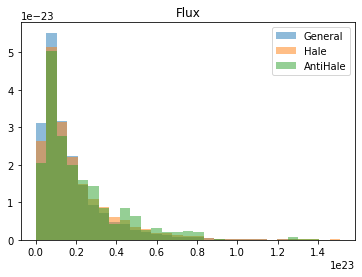

In [94]:
# flux

plt.hist(KPVT['BMRFlux'], density=True, alpha=0.5, bins=bins_flux, label='General')
plt.hist(kpvt_filter_hh['BMRFlux'], density=True, alpha=0.5, bins=bins_flux, label='Hale')
plt.hist(kpvt_filter_ah['BMRFlux'], density=True, alpha=0.5, bins=bins_flux, label='AntiHale')
plt.title('Flux')
plt.legend()
plt.show()

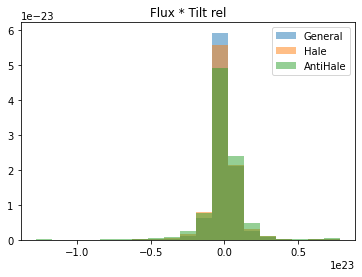

In [95]:
# flux x tilt rel

plt.hist(KPVT['BMRFlux'] * np.sin(KPVT['Tilt_rel'] * np.pi/180), density=True, bins=bins_flux_tilt, alpha=0.5, label='General')
plt.hist(kpvt_filter_hh['BMRFlux'] * np.sin(kpvt_filter_hh['Tilt_rel'] * np.pi/180), density=True, bins=bins_flux_tilt, alpha=0.5, label='Hale')
plt.hist(kpvt_filter_ah['BMRFlux'] * np.sin(kpvt_filter_ah['Tilt_rel'] * np.pi/180), density=True, bins=bins_flux_tilt, alpha=0.5, label='AntiHale')
plt.title('Flux * Tilt rel')
plt.legend()
plt.show()

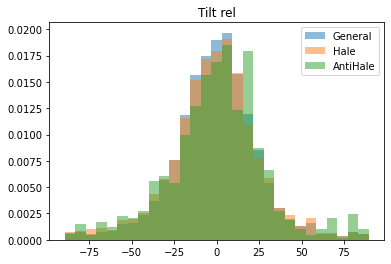

In [96]:
# tilt rel

plt.hist(KPVT['Tilt_rel'], density=True, alpha=0.5, bins=bins_tilt_rel, label='General')
plt.hist(kpvt_filter_hh['Tilt_rel'], density=True, alpha=0.5, bins=bins_tilt_rel, label='Hale')
plt.hist(kpvt_filter_ah['Tilt_rel'], density=True, alpha=0.5, bins=bins_tilt_rel, label='AntiHale')
plt.title('Tilt rel')
plt.legend()
plt.show()

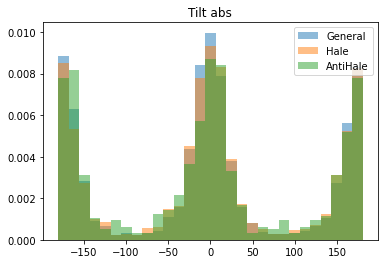

In [97]:
# tilt abs

plt.hist(KPVT['Tilt_abs'], density=True, alpha=0.5, bins=bins_tilt_abs, label='General')
plt.hist(kpvt_filter_hh['Tilt_abs'], density=True, alpha=0.5, bins=bins_tilt_abs, label='Hale')
plt.hist(kpvt_filter_ah['Tilt_abs'], density=True, alpha=0.5, bins=bins_tilt_abs, label='AntiHale')
plt.title('Tilt abs')
plt.legend()
plt.show()

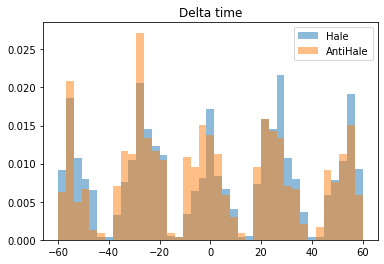

In [98]:
# delta_time

plt.hist(kpvt_filter_hh['delta_time'], density=True, alpha=0.5, bins=bins_delta_t, label='Hale')
plt.hist(kpvt_filter_ah['delta_time'], density=True, alpha=0.5, bins=bins_delta_t, label='AntiHale')
plt.title('Delta time')
plt.legend()
plt.show()

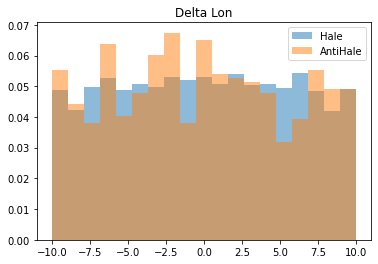

In [99]:
# delta_lon

plt.hist(kpvt_filter_hh['delta_lon'], density=True, alpha=0.5, bins=bins_delta_lon, label='Hale')
plt.hist(kpvt_filter_ah['delta_lon'], density=True, alpha=0.5, bins=bins_delta_lon, label='AntiHale')
plt.title('Delta Lon')
plt.legend()
plt.show()

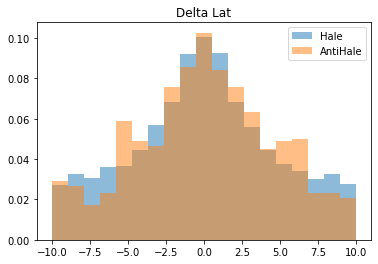

In [100]:
# delta_lat

plt.hist(kpvt_filter_hh['delta_lat'], density=True, alpha=0.5, bins=bins_delta_lat, label='Hale')
plt.hist(kpvt_filter_ah['delta_lat'], density=True, alpha=0.5, bins=bins_delta_lat, label='AntiHale')
plt.title('Delta Lat')
plt.legend()
plt.show()

### SPMG

In [101]:
spmg_filter_hh = pd.DataFrame()
spmg_filter_ah = pd.DataFrame()

for i in range(len(SPMG)):
    region = SPMG.iloc[i,0:]
    mask = indentificador(SPMG, region, tol, d_before, d_after)
    if region['AH_22n'] or region['AH_22s'] or region['AH_23n'] or region['AH_23s']:
        spmg_filter_ah = spmg_filter_ah.append(mask, ignore_index = True)
    elif region['HH_22n'] or region['HH_22s'] or region['HH_23n'] or region['HH_23s']:
        spmg_filter_hh = spmg_filter_hh.append(mask, ignore_index = True)

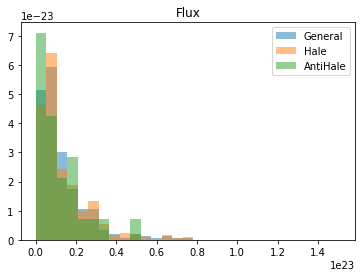

In [102]:
# flux

plt.hist(SPMG['BMRFlux'], density=True, alpha=0.5, bins=bins_flux, label='General')
plt.hist(spmg_filter_hh['BMRFlux'], density=True, alpha=0.5, bins=bins_flux, label='Hale')
plt.hist(spmg_filter_ah['BMRFlux'], density=True, alpha=0.5, bins=bins_flux, label='AntiHale')
plt.title('Flux')
plt.legend()
plt.show()

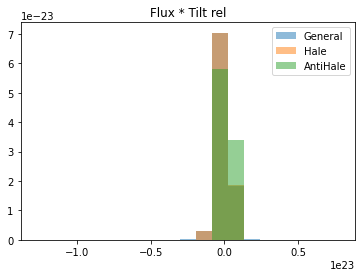

In [103]:
# flux x tilt rel

plt.hist(SPMG['BMRFlux'] * np.sin(SPMG['Tilt_rel'] * np.pi/180), density=True, bins=bins_flux_tilt, alpha=0.5, label='General')
plt.hist(spmg_filter_hh['BMRFlux'] * np.sin(spmg_filter_hh['Tilt_rel'] * np.pi/180), density=True, bins=bins_flux_tilt, alpha=0.5, label='Hale')
plt.hist(spmg_filter_ah['BMRFlux'] * np.sin(spmg_filter_ah['Tilt_rel'] * np.pi/180), density=True, bins=bins_flux_tilt, alpha=0.5, label='AntiHale')
plt.title('Flux * Tilt rel')
plt.legend()
plt.show()

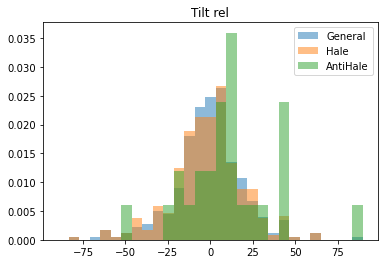

In [104]:
# tilt rel

plt.hist(SPMG['Tilt_rel'], density=True, alpha=0.5, bins=bins_tilt_rel, label='General')
plt.hist(spmg_filter_hh['Tilt_rel'], density=True, alpha=0.5, bins=bins_tilt_rel, label='Hale')
plt.hist(spmg_filter_ah['Tilt_rel'], density=True, alpha=0.5, bins=bins_tilt_rel, label='AntiHale')
plt.title('Tilt rel')
plt.legend()
plt.show()

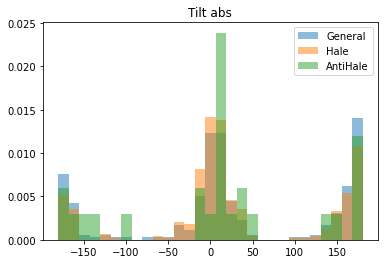

In [105]:
# tilt abs

plt.hist(SPMG['Tilt_abs'], density=True, alpha=0.5, bins=bins_tilt_abs, label='General')
plt.hist(spmg_filter_hh['Tilt_abs'], density=True, alpha=0.5, bins=bins_tilt_abs, label='Hale')
plt.hist(spmg_filter_ah['Tilt_abs'], density=True, alpha=0.5, bins=bins_tilt_abs, label='AntiHale')
plt.title('Tilt abs')
plt.legend()
plt.show()

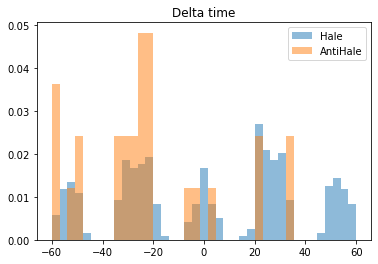

In [106]:
# delta_time

bins = np.linspace(-d_before, d_after, 20)

plt.hist(spmg_filter_hh['delta_time'], density=True, alpha=0.5, bins=bins_delta_t, label='Hale')
plt.hist(spmg_filter_ah['delta_time'], density=True, alpha=0.5, bins=bins_delta_t, label='AntiHale')
plt.title('Delta time')
plt.legend()
plt.show()

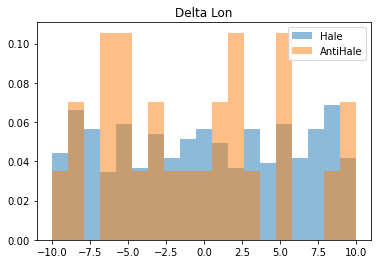

In [107]:
# delta_lon

bins = np.linspace(-tol, tol, 20)

plt.hist(spmg_filter_hh['delta_lon'], density=True, alpha=0.5, bins=bins_delta_lon, label='Hale')
plt.hist(spmg_filter_ah['delta_lon'], density=True, alpha=0.5, bins=bins_delta_lon, label='AntiHale')
plt.title('Delta Lon')
plt.legend()
plt.show()

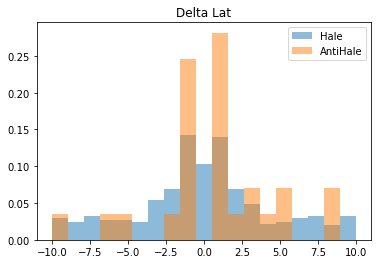

In [108]:
# delta_lat

bins = np.linspace(-tol, tol, 20)

plt.hist(spmg_filter_hh['delta_lat'], density=True, alpha=0.5, bins=bins_delta_lat, label='Hale')
plt.hist(spmg_filter_ah['delta_lat'], density=True, alpha=0.5, bins=bins_delta_lat, label='AntiHale')
plt.title('Delta Lat')
plt.legend()
plt.show()

### MDI

In [109]:
mdi_filter_hh = pd.DataFrame()
mdi_filter_ah = pd.DataFrame()

for i in range(len(MDI)):
    region = MDI.iloc[i,0:]
    mask = indentificador(MDI, region, tol, d_before, d_after)
    if region['AH_23n'] or region['AH_23s'] or region['AH_24n'] or region['AH_24s']:
        mdi_filter_ah = mdi_filter_ah.append(mask, ignore_index = True)
    elif region['HH_23n'] or region['HH_23s'] or region['HH_24n'] or region['HH_24s']:
        mdi_filter_hh = mdi_filter_hh.append(mask, ignore_index = True)

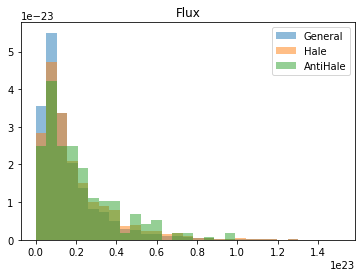

In [110]:
# flux

plt.hist(MDI['BMRFlux'], density=True, alpha=0.5, bins=bins_flux, label='General')
plt.hist(mdi_filter_hh['BMRFlux'], density=True, alpha=0.5, bins=bins_flux, label='Hale')
plt.hist(mdi_filter_ah['BMRFlux'], density=True, alpha=0.5, bins=bins_flux, label='AntiHale')
plt.title('Flux')
plt.legend()
plt.show()

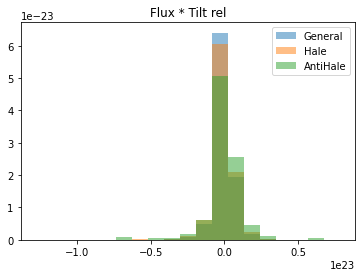

In [111]:
# flux x tilt rel

plt.hist(MDI['BMRFlux'] * np.sin(MDI['Tilt_rel'] * np.pi/180), density=True, bins=bins_flux_tilt, alpha=0.5, label='General')
plt.hist(mdi_filter_hh['BMRFlux'] * np.sin(mdi_filter_hh['Tilt_rel'] * np.pi/180), density=True, bins=bins_flux_tilt, alpha=0.5, label='Hale')
plt.hist(mdi_filter_ah['BMRFlux'] * np.sin(mdi_filter_ah['Tilt_rel'] * np.pi/180), density=True, bins=bins_flux_tilt, alpha=0.5, label='AntiHale')
plt.title('Flux * Tilt rel')
plt.legend()
plt.show()

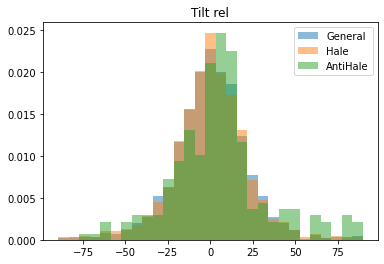

In [112]:
# tilt rel

plt.hist(MDI['Tilt_rel'], density=True, alpha=0.5, bins=bins_tilt_rel, label='General')
plt.hist(mdi_filter_hh['Tilt_rel'], density=True, alpha=0.5, bins=bins_tilt_rel, label='Hale')
plt.hist(mdi_filter_ah['Tilt_rel'], density=True, alpha=0.5, bins=bins_tilt_rel, label='AntiHale')
plt.title('Tilt rel')
plt.legend()
plt.show()

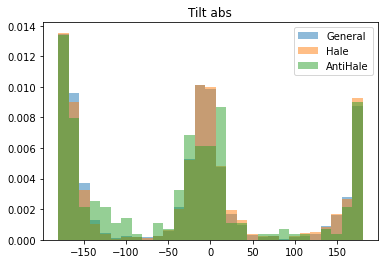

In [113]:
# tilt abs

plt.hist(MDI['Tilt_abs'], density=True, alpha=0.5, bins=bins_tilt_abs, label='General')
plt.hist(mdi_filter_hh['Tilt_abs'], density=True, alpha=0.5, bins=bins_tilt_abs, label='Hale')
plt.hist(mdi_filter_ah['Tilt_abs'], density=True, alpha=0.5, bins=bins_tilt_abs, label='AntiHale')
plt.title('Tilt abs')
plt.legend()
plt.show()

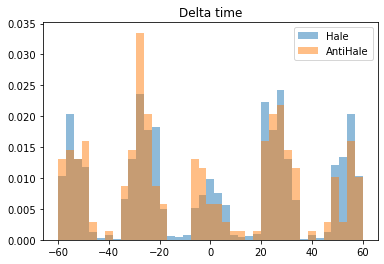

In [114]:
# delta_time

plt.hist(mdi_filter_hh['delta_time'], density=True, alpha=0.5, bins=bins_delta_t, label='Hale')
plt.hist(mdi_filter_ah['delta_time'], density=True, alpha=0.5, bins=bins_delta_t, label='AntiHale')
plt.title('Delta time')
plt.legend()
plt.show()

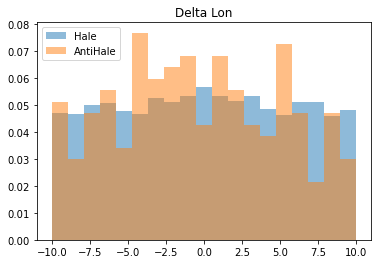

In [115]:
# delta_lon

plt.hist(mdi_filter_hh['delta_lon'], density=True, alpha=0.5, bins=bins_delta_lon, label='Hale')
plt.hist(mdi_filter_ah['delta_lon'], density=True, alpha=0.5, bins=bins_delta_lon, label='AntiHale')
plt.title('Delta Lon')
plt.legend()
plt.show()

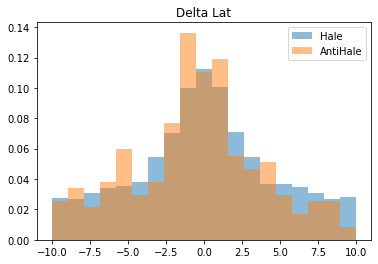

In [116]:
# delta_lat

plt.hist(mdi_filter_hh['delta_lat'], density=True, alpha=0.5, bins=bins_delta_lat, label='Hale')
plt.hist(mdi_filter_ah['delta_lat'], density=True, alpha=0.5, bins=bins_delta_lat, label='AntiHale')
plt.title('Delta Lat')
plt.legend()
plt.show()

### HMI

In [117]:
hmi_filter_hh = pd.DataFrame()
hmi_filter_ah = pd.DataFrame()

for i in range(len(HMI)):
    region = HMI.iloc[i,0:]
    mask = indentificador(HMI, region, tol, d_before, d_after)
    if region['AH_24n'] or region['AH_24s']:
        hmi_filter_ah = hmi_filter_ah.append(mask, ignore_index = True)
    elif region['HH_24n'] or region['HH_24s']:
        hmi_filter_hh = hmi_filter_hh.append(mask, ignore_index = True)

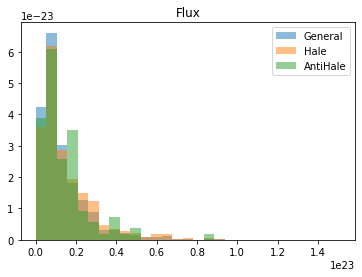

In [118]:
# flux

plt.hist(HMI['BMRFlux'], density=True, alpha=0.5, bins=bins_flux, label='General')
plt.hist(hmi_filter_hh['BMRFlux'], density=True, alpha=0.5, bins=bins_flux, label='Hale')
plt.hist(hmi_filter_ah['BMRFlux'], density=True, alpha=0.5, bins=bins_flux, label='AntiHale')
plt.title('Flux')
plt.legend()
plt.show()

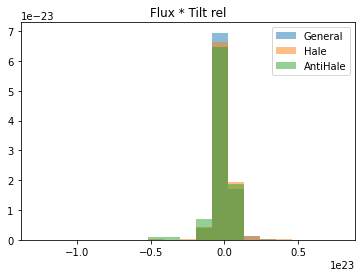

In [119]:
# flux x tilt rel

plt.hist(HMI['BMRFlux'] * np.sin(HMI['Tilt_rel'] * np.pi/180), density=True, bins=bins_flux_tilt, alpha=0.5, label='General')
plt.hist(hmi_filter_hh['BMRFlux'] * np.sin(hmi_filter_hh['Tilt_rel'] * np.pi/180), density=True, bins=bins_flux_tilt, alpha=0.5, label='Hale')
plt.hist(hmi_filter_ah['BMRFlux'] * np.sin(hmi_filter_ah['Tilt_rel'] * np.pi/180), density=True, bins=bins_flux_tilt, alpha=0.5, label='AntiHale')
plt.title('Flux * Tilt rel')
plt.legend()
plt.show()

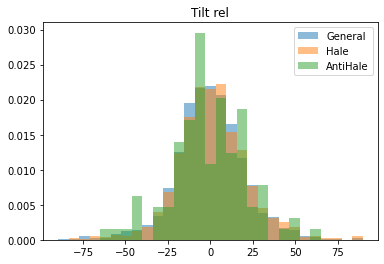

In [120]:
# tilt rel

plt.hist(HMI['Tilt_rel'], density=True, alpha=0.5, bins=bins_tilt_rel, label='General')
plt.hist(hmi_filter_hh['Tilt_rel'], density=True, alpha=0.5, bins=bins_tilt_rel, label='Hale')
plt.hist(hmi_filter_ah['Tilt_rel'], density=True, alpha=0.5, bins=bins_tilt_rel, label='AntiHale')
plt.title('Tilt rel')
plt.legend()
plt.show()

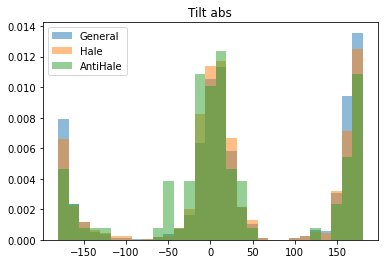

In [121]:
# tilt abs

plt.hist(HMI['Tilt_abs'], density=True, alpha=0.5, bins=bins_tilt_abs, label='General')
plt.hist(hmi_filter_hh['Tilt_abs'], density=True, alpha=0.5, bins=bins_tilt_abs, label='Hale')
plt.hist(hmi_filter_ah['Tilt_abs'], density=True, alpha=0.5, bins=bins_tilt_abs, label='AntiHale')
plt.title('Tilt abs')
plt.legend()
plt.show()

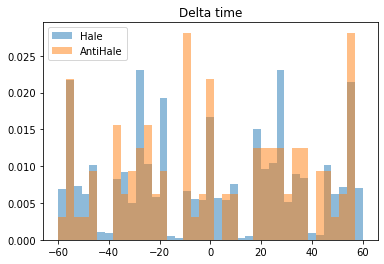

In [122]:
# delta_time

bins = np.linspace(-d_before, d_after, 20)

plt.hist(hmi_filter_hh['delta_time'], density=True, alpha=0.5, bins=bins_delta_t, label='Hale')
plt.hist(hmi_filter_ah['delta_time'], density=True, alpha=0.5, bins=bins_delta_t, label='AntiHale')
plt.title('Delta time')
plt.legend()
plt.show()

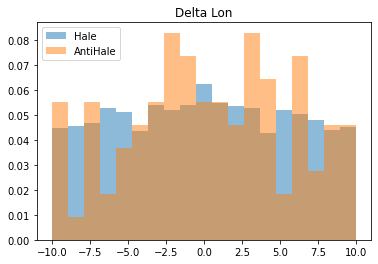

In [123]:
# delta_lon

plt.hist(hmi_filter_hh['delta_lon'], density=True, alpha=0.5, bins=bins_delta_lon, label='Hale')
plt.hist(hmi_filter_ah['delta_lon'], density=True, alpha=0.5, bins=bins_delta_lon, label='AntiHale')
plt.title('Delta Lon')
plt.legend()
plt.show()

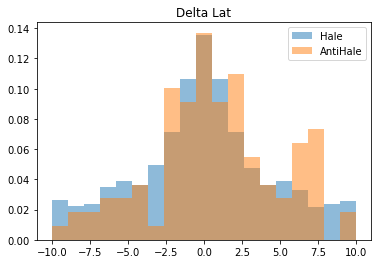

In [124]:
# delta_lat

plt.hist(hmi_filter_hh['delta_lat'], density=True, alpha=0.5, bins=bins_delta_lat, label='Hale')
plt.hist(hmi_filter_ah['delta_lat'], density=True, alpha=0.5, bins=bins_delta_lat, label='AntiHale')
plt.title('Delta Lat')
plt.legend()
plt.show()